<a href="https://colab.research.google.com/github/StanStarishko/python-programming-for-data/blob/main/Worksheets/6_r_worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using R for data analysis #

R is a powerful statistical tool used frequently in science academia. Similar to Python, to use R effectively, we must use a variety of libraries.  

**Run the cell block below to install and load the necessary packages**

In [ ]:
# this code needs to be run once to install the packages on your system
#install.packages("tidyverse")
#install.packages("ggplot2")
install.packages("fastDummies")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Run the cell block below here to open the packages ready for use**

In [ ]:
# this code needs to be run to open the packages

# tidyverse includes dpylr which includes all the functions such as mutate, select, summarise etc
library("tidyverse")

# ggplot2 contains all the visualisation tools (similar to matplotlib)
library("ggplot2")

# fastdummies is for dummy coding
library("fastDummies")

# displaying in real numbers

options(scipen = 999)

# Purpose of this worksheet
---

The purpose of this worksheet is NOT to learn the R programming language.  Rather, it is intended to show some statistical methods that haven't yet been covered, using R as the coding language.  

This will allow some exposure to a different language, used for often different reasons from using Python.


### In this worksheet you will start by using R versions of operations you have already used in Python.  Then you will be analysing student performance data and performing a multiple linear regression. ###

url = "https://raw.githubusercontent.com/futureCodersSE/python-programming-for-data/main/Datasets/exams.csv"

### Setting variables ###

```variable <- ...```

**In R we use <- instead of using = python**

### Reading data from our computer into a variable ###

```data <- read_csv("data.csv")```

### Reading data from a URL into a variable ###

```data <- read_csv("https://raw.github.com/file.csv")```

### Look at the first few rows of the dataset ###

```head(data)```

### Summary of the data ###

```summary(data)```

## Exercise 1
---

Read the data into a variable and have a look at it.

In [ ]:
# Read the data into a variable and have a look at it
url =  "https://raw.githubusercontent.com/futureCodersSE/python-programming-for-data/main/Datasets/exams.csv"
r_data <- read.csv(url)

# print head
head(r_data)

# print tail
tail(r_data)

# print info
summary(r_data)


,gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group E,some college,free/reduced,none,65,76,71
2,male,group C,some college,standard,completed,75,72,69
3,female,group B,some high school,free/reduced,completed,62,56,61
4,male,group D,some high school,standard,completed,60,60,59
5,female,group C,high school,free/reduced,completed,34,54,55
6,female,group B,some college,free/reduced,none,53,66,61


,gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
995,female,group D,associate's degree,standard,completed,72,74,80
996,male,group B,some college,standard,completed,80,73,74
997,male,group D,high school,standard,completed,82,87,82
998,female,group C,associate's degree,standard,completed,65,94,93
999,male,group B,master's degree,free/reduced,none,62,62,57
1000,male,group B,some college,standard,none,38,39,40


    gender           ethnicity         parental_education    lunch          
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 preparation_course   math_score     reading_score    writing_score   
 Length:1000        Min.   : 13.00   Min.   : 16.00   Min.   : 12.00  
 Class :character   1st Qu.: 57.00   1st Qu.: 60.00   1st Qu.: 58.00  
 Mode  :character   Median : 67.00   Median : 70.00   Median : 69.00  
                    Mean   : 66.86   Mean   : 69.72   Mean   : 68.58  
                    3rd Qu.: 77.00   3rd Qu.: 80.00   3rd Qu.: 80.00  
                    Max.   :100.00 

# Lets have a look at the data ###

We can use the `arrange()` function to sort the data or `desc()` function to sort into descending order

```
arranged_column <- arrange(data, column_name)
head(arranged_column)
tail(arranged_column)
summary(arranged_column)
```

We can use the select() function to look at specific columns

```
column_specific <- select(data, column_1, column_2)
column_specific
```



### Exercise 2 ###
---

Now have a go looking at the data in different ways, using the functions above:

In [ ]:
# regular sorting
sorted_data <- arrange(r_data, gender,ethnicity,parental_education)
head(sorted_data)
tail(sorted_data)
summary(sorted_data)

# opposite sorting
desc_sorted_data <- arrange(r_data, desc(gender),desc(ethnicity),desc(parental_education))
head(desc_sorted_data)
tail(desc_sorted_data)
summary(desc_sorted_data)


# mix sorting
desc_sorted_data <- arrange(r_data, gender,desc(ethnicity),parental_education)
head(desc_sorted_data)
tail(desc_sorted_data)
summary(desc_sorted_data)

# selected columns
column_specific <- select(desc_sorted_data, gender,ethnicity,parental_education)
head(column_specific)
tail(column_specific)
summary(column_specific)


,gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group A,associate's degree,standard,completed,59,73,67
2,female,group A,associate's degree,free/reduced,completed,63,78,83
3,female,group A,associate's degree,standard,none,67,76,75
4,female,group A,associate's degree,standard,none,67,77,74
5,female,group A,associate's degree,standard,completed,57,69,71
6,female,group A,bachelor's degree,standard,none,73,73,82


,gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
995,male,group E,some high school,free/reduced,completed,83,74,71
996,male,group E,some high school,free/reduced,completed,81,72,71
997,male,group E,some high school,free/reduced,completed,47,35,34
998,male,group E,some high school,standard,completed,87,76,74
999,male,group E,some high school,free/reduced,none,78,69,71
1000,male,group E,some high school,standard,none,91,81,74


    gender           ethnicity         parental_education    lunch          
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 preparation_course   math_score     reading_score    writing_score   
 Length:1000        Min.   : 13.00   Min.   : 16.00   Min.   : 12.00  
 Class :character   1st Qu.: 57.00   1st Qu.: 60.00   1st Qu.: 58.00  
 Mode  :character   Median : 67.00   Median : 70.00   Median : 69.00  
                    Mean   : 66.86   Mean   : 69.72   Mean   : 68.58  
                    3rd Qu.: 77.00   3rd Qu.: 80.00   3rd Qu.: 80.00  
                    Max.   :100.00 

,gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,male,group E,some high school,standard,none,93,73,70
2,male,group E,some high school,standard,none,64,59,54
3,male,group E,some high school,standard,none,68,62,54
4,male,group E,some high school,free/reduced,none,56,49,50
5,male,group E,some high school,free/reduced,completed,82,74,72
6,male,group E,some high school,standard,completed,56,42,39


,gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
995,female,group A,bachelor's degree,standard,none,67,87,85
996,female,group A,associate's degree,standard,completed,59,73,67
997,female,group A,associate's degree,free/reduced,completed,63,78,83
998,female,group A,associate's degree,standard,none,67,76,75
999,female,group A,associate's degree,standard,none,67,77,74
1000,female,group A,associate's degree,standard,completed,57,69,71


    gender           ethnicity         parental_education    lunch          
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 preparation_course   math_score     reading_score    writing_score   
 Length:1000        Min.   : 13.00   Min.   : 16.00   Min.   : 12.00  
 Class :character   1st Qu.: 57.00   1st Qu.: 60.00   1st Qu.: 58.00  
 Mode  :character   Median : 67.00   Median : 70.00   Median : 69.00  
                    Mean   : 66.86   Mean   : 69.72   Mean   : 68.58  
                    3rd Qu.: 77.00   3rd Qu.: 80.00   3rd Qu.: 80.00  
                    Max.   :100.00 

,gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group E,associate's degree,free/reduced,none,61,64,62
2,female,group E,associate's degree,standard,none,71,72,73
3,female,group E,associate's degree,free/reduced,completed,49,66,68
4,female,group E,associate's degree,standard,none,79,83,78
5,female,group E,associate's degree,standard,none,80,87,77
6,female,group E,associate's degree,standard,none,78,81,83


,gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
995,male,group A,some high school,standard,completed,75,76,73
996,male,group A,some high school,free/reduced,none,23,30,24
997,male,group A,some high school,standard,none,68,55,53
998,male,group A,some high school,standard,none,72,57,51
999,male,group A,some high school,standard,none,63,59,50
1000,male,group A,some high school,free/reduced,none,75,71,73


    gender           ethnicity         parental_education    lunch          
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 preparation_course   math_score     reading_score    writing_score   
 Length:1000        Min.   : 13.00   Min.   : 16.00   Min.   : 12.00  
 Class :character   1st Qu.: 57.00   1st Qu.: 60.00   1st Qu.: 58.00  
 Mode  :character   Median : 67.00   Median : 70.00   Median : 69.00  
                    Mean   : 66.86   Mean   : 69.72   Mean   : 68.58  
                    3rd Qu.: 77.00   3rd Qu.: 80.00   3rd Qu.: 80.00  
                    Max.   :100.00 

,gender,ethnicity,parental_education
,<chr>,<chr>,<chr>
1,female,group E,associate's degree
2,female,group E,associate's degree
3,female,group E,associate's degree
4,female,group E,associate's degree
5,female,group E,associate's degree
6,female,group E,associate's degree


,gender,ethnicity,parental_education
,<chr>,<chr>,<chr>
995,male,group A,some high school
996,male,group A,some high school
997,male,group A,some high school
998,male,group A,some high school
999,male,group A,some high school
1000,male,group A,some high school


    gender           ethnicity         parental_education
 Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  

# Prepare the data for a linear regression

Rows containing null, or error-prone values can affect statistics such as measures of central tendency (e.g. mean, median) and operations such as linear regressions, reducing accuracy.

To check for null values we can use:

``` is.na(data) ```

To remove rows which contain null values we can use:  

``` na.omit(data) ```



### Exercise 3
---

Check your dataframe for null values and remove rows with null values if necessary

In [ ]:
no_na_data <- r_data
# change data
no_na_data[1,1] <- NA
no_na_data[4,3] <- NA

# create, check and display check
check_df <- is.na(no_na_data)
head(check_df)
tail(check_df)
summary(check_df)

# create and diplay data without NULL
deleted_df <- na.omit(no_na_data)
head(deleted_df)
tail(deleted_df)
summary(deleted_df)

# create, check and display check
new_check_df <- is.na(deleted_df)
head(new_check_df)
tail(new_check_df)
summary(new_check_df)


gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


,gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
"[995,]",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"[996,]",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"[997,]",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"[998,]",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"[999,]",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"[1000,]",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


   gender        ethnicity       parental_education   lunch        
 Mode :logical   Mode :logical   Mode :logical      Mode :logical  
 FALSE:999       FALSE:1000      FALSE:999          FALSE:1000     
 TRUE :1                         TRUE :1                           
 preparation_course math_score      reading_score   writing_score  
 Mode :logical      Mode :logical   Mode :logical   Mode :logical  
 FALSE:1000         FALSE:1000      FALSE:1000      FALSE:1000     
                                                                   

,gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
2,male,group C,some college,standard,completed,75,72,69
3,female,group B,some high school,free/reduced,completed,62,56,61
5,female,group C,high school,free/reduced,completed,34,54,55
6,female,group B,some college,free/reduced,none,53,66,61
7,female,group D,some college,standard,none,85,88,92
8,male,group E,some high school,standard,none,93,73,70


,gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
995,female,group D,associate's degree,standard,completed,72,74,80
996,male,group B,some college,standard,completed,80,73,74
997,male,group D,high school,standard,completed,82,87,82
998,female,group C,associate's degree,standard,completed,65,94,93
999,male,group B,master's degree,free/reduced,none,62,62,57
1000,male,group B,some college,standard,none,38,39,40


    gender           ethnicity         parental_education    lunch          
 Length:998         Length:998         Length:998         Length:998        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 preparation_course   math_score     reading_score    writing_score   
 Length:998         Min.   : 13.00   Min.   : 16.00   Min.   : 12.00  
 Class :character   1st Qu.: 57.00   1st Qu.: 60.00   1st Qu.: 58.00  
 Mode  :character   Median : 67.00   Median : 70.00   Median : 69.00  
                    Mean   : 66.87   Mean   : 69.73   Mean   : 68.58  
                    3rd Qu.: 77.00   3rd Qu.: 80.00   3rd Qu.: 80.00  
                    Max.   :100.00 

,gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
5,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
6,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
7,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
8,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


,gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
995,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
996,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
997,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
998,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
999,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
1000,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


   gender        ethnicity       parental_education   lunch        
 Mode :logical   Mode :logical   Mode :logical      Mode :logical  
 FALSE:998       FALSE:998       FALSE:998          FALSE:998      
 preparation_course math_score      reading_score   writing_score  
 Mode :logical      Mode :logical   Mode :logical   Mode :logical  
 FALSE:998          FALSE:998       FALSE:998       FALSE:998      

### Visualise data distribution ###
---

In statistics, when you are preparing data for analysis, you must first check if your data is Gaussian or not (normally distributed).

If data is normally distributed, it will have a bell curve and the spread of the data will tend to be small, with the mean centred in the data.

The types of statistical test that are meaningful for the data depend on whether or not your data is normally distributed.

To check for normality, lets first look at a histogram:

**Using the ggplot2 package (similar to pythons Matplotlib):**

```qplot(data$column, geom="histogram") ```

In R, `$` is used to specify the dataframe and target column so `data$age` would tell R to look at the age column - in Python pandas this would be ```df['age'] ```

### Exercise 4 ###
---

Create histograms to check the distribution of each numeric column in your data (writing_score, reading_score, math_score)

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


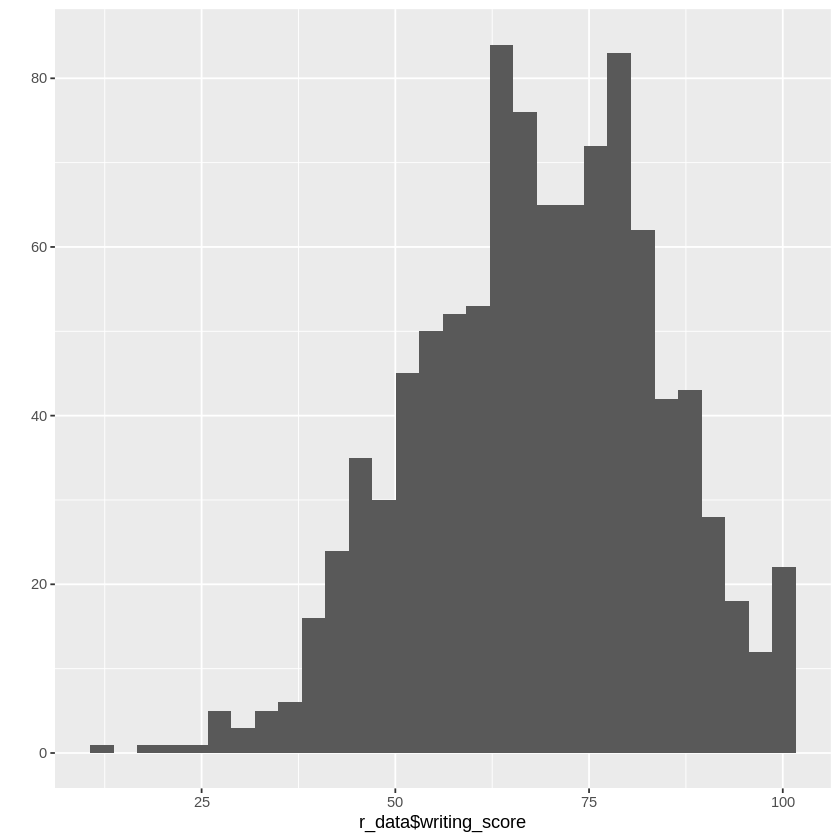

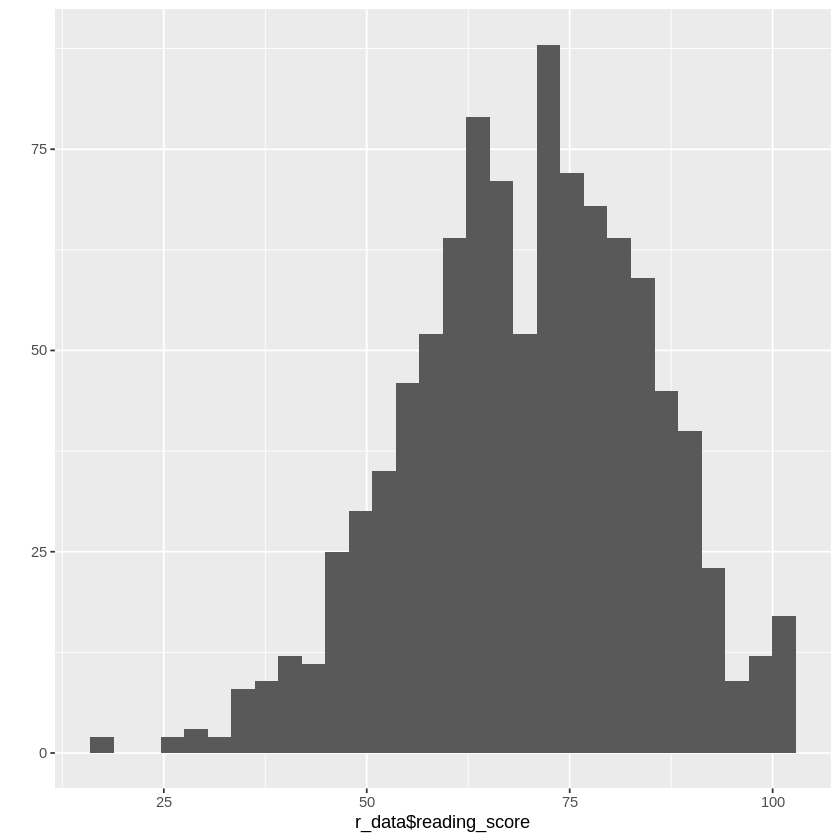

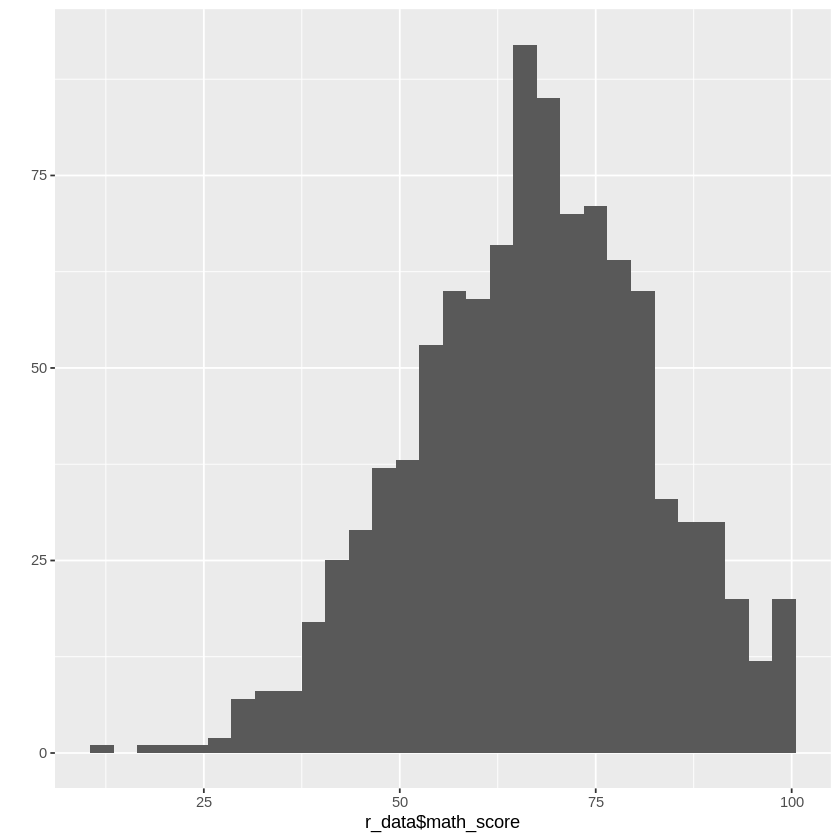

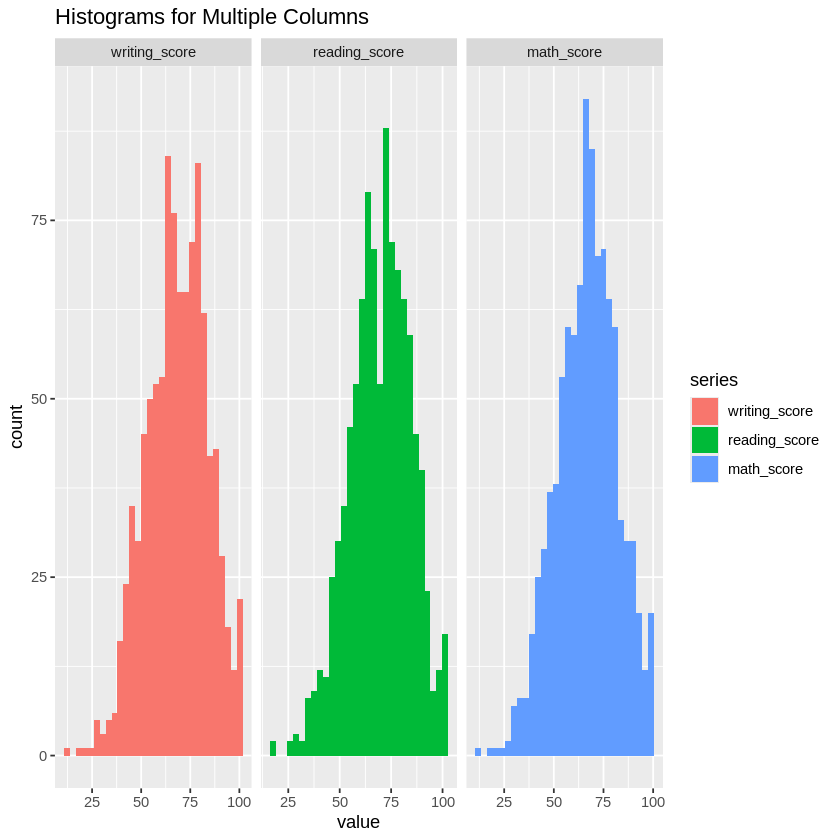

In [ ]:
# Create histograms to check the distribution of each numeric column in your data (writing_score, reading_score, math_score)
qplot(r_data$writing_score, geom="histogram", bins = 30)
qplot(r_data$reading_score, geom="histogram", bins = 30)
qplot(r_data$math_score, geom="histogram", bins = 30)

# transforming data
data_long <- pivot_longer(r_data,
  cols = c(writing_score,reading_score,math_score),
  names_to = "series",
  values_to = "value")

# sort columns
data_long$series <- factor(data_long$series,
  levels = c("writing_score", "reading_score", "math_score"))

# create one histogram
ggplot(data_long, aes(x = value, fill = series)) +
  geom_histogram(position = "dodge", bins = 30) +
  facet_wrap(~series, scales = "free_x") +
  labs(title = "Histograms for Multiple Columns")


## What about data that isn't numeric?
---

A linear regression is essentially a mathematical formula, which finds 2 terms (the slope and intercept) and can use that to predict new values.

Obviously you cannot do any calculations on words (such as male or female). Therefore, we need to 'dummy code' categorical values such as sex.

When R does the mathematical equation for the regression, we do not want the new dummy codes to interfere with the calculation, to get around that, we code the data using 0 and 1.

**There are many ways to dummy code your data, but to make things easy we are going to use a package!**

``` df_dummy <- dummy_cols(data, select_columns = c('column1', 'column2', 'column3'), remove_first_dummy = TRUE, remove_selected_columns = TRUE) ```

The above code sets the new dataframe in a variable called `df_dummy`, it then states which dataframe we mean, then in the brackets, you put the column names that you want dummy coded.

```remove_selected_columns = TRUE``` tells R to delete the existing categorical data columns afterwards

```remove_first_dummy = TRUE``` tells R to remove the first dummy column. dummy_cols will create one column for each categorical value in the original column (so the sex columns becomes 2 columns called sex_female and sex_male) So removing the first column would leave the column sex__male,  where 1 means male and 0 means female. Removing the first ethnicity column leaves the other 4 columns and any row that has 0 in all four columns can be assumed to be ethnicity A.  This is important as it stops multicollinearity in your model (your variables being too related to each other messing up the results).

### Exercise 5 ###
---

Dummy code the categorical columns, removing the first dummy and the original columns.

In [ ]:
# Dummy code the categorical columns, removing the first dummy and the original columns
non_numeric_columns <- names(r_data)[!sapply(r_data, is.numeric)]

dummy_df <- dummy_cols(r_data,
  select_columns = non_numeric_columns,
  remove_first_dummy = TRUE,
  remove_selected_columns = TRUE)

# display data
head(dummy_df)
tail(dummy_df)
summary(dummy_df)
print("")
print(paste("Len:",nrow(dummy_df)))


,math_score,reading_score,writing_score,gender_male,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E,parental_education_bachelor's degree,parental_education_high school,parental_education_master's degree,parental_education_some college,parental_education_some high school,lunch_standard,preparation_course_none
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,65,76,71,0,0,0,0,1,0,0,0,1,0,0,1
2,75,72,69,1,0,1,0,0,0,0,0,1,0,1,0
3,62,56,61,0,1,0,0,0,0,0,0,0,1,0,0
4,60,60,59,1,0,0,1,0,0,0,0,0,1,1,0
5,34,54,55,0,0,1,0,0,0,1,0,0,0,0,0
6,53,66,61,0,1,0,0,0,0,0,0,1,0,0,1


,math_score,reading_score,writing_score,gender_male,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E,parental_education_bachelor's degree,parental_education_high school,parental_education_master's degree,parental_education_some college,parental_education_some high school,lunch_standard,preparation_course_none
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
995,72,74,80,0,0,0,1,0,0,0,0,0,0,1,0
996,80,73,74,1,1,0,0,0,0,0,0,1,0,1,0
997,82,87,82,1,0,0,1,0,0,1,0,0,0,1,0
998,65,94,93,0,0,1,0,0,0,0,0,0,0,1,0
999,62,62,57,1,1,0,0,0,0,0,1,0,0,0,1
1000,38,39,40,1,1,0,0,0,0,0,0,1,0,1,1


   math_score     reading_score    writing_score     gender_male   
 Min.   : 13.00   Min.   : 16.00   Min.   : 12.00   Min.   :0.000  
 1st Qu.: 57.00   1st Qu.: 60.00   1st Qu.: 58.00   1st Qu.:0.000  
 Median : 67.00   Median : 70.00   Median : 69.00   Median :1.000  
 Mean   : 66.86   Mean   : 69.72   Mean   : 68.58   Mean   :0.504  
 3rd Qu.: 77.00   3rd Qu.: 80.00   3rd Qu.: 80.00   3rd Qu.:1.000  
 Max.   :100.00   Max.   :100.00   Max.   :100.00   Max.   :1.000  
 ethnicity_group B ethnicity_group C ethnicity_group D ethnicity_group E
 Min.   :0.000     Min.   :0.000     Min.   :0.000     Min.   :0.000    
 1st Qu.:0.000     1st Qu.:0.000     1st Qu.:0.000     1st Qu.:0.000    
 Median :0.000     Median :0.000     Median :0.000     Median :0.000    
 Mean   :0.197     Mean   :0.313     Mean   :0.254     Mean   :0.154    
 3rd Qu.:0.000     3rd Qu.:1.000     3rd Qu.:1.000     3rd Qu.:0.000    
 Max.   :1.000     Max.   :1.000     Max.   :1.000     Max.   :1.000    
 parental_edu

[1] ""
[1] "Len: 1000"


### We want to work out if all the independent variables (eg. gender, race, parents education) predict students exam peformance. ###
---

At the moment, writing, math and reading scores are seperated.   
Lets make a new column with the total scores.   

To do this we use the ``mutate()`` function

``` new_df <- mutate(data, new_column = ....) ```

eg:

``` new_df <- mutate(data, new_column = column1 / column2) ```  
``` new_df <- mutate(data, new_column = column1 + column2) ```  
``` new_df <- mutate(data, new_column = column1 * 2) ```  

etc..

### Exercise 6 ###
---

Using the mutate function, create a new column called ```total_score``` which contains the sum of each students reading, writing and math scores.

In [ ]:
# create a new column called total_score which contains the sum of each students reading, writing and math scores
##############################################
# first way
##############################################
new_df <- r_data %>%
  rowwise() %>%
  mutate(total = sum(c_across(where(is.numeric))))

# display data
head(new_df)
tail(new_df)
summary(new_df)

##############################################
# second way
##############################################
new_df <- mutate(r_data, total = math_score + reading_score + writing_score)

# display data
head(new_df)
tail(new_df)
summary(new_df)

##############################################
# third way
##############################################
numeric_columns <- names(r_data)[sapply(r_data, is.numeric)]
new_df <- r_data %>%
  rowwise() %>%
  mutate(total = sum(c_across(all_of(numeric_columns))))

# display data
head(new_df)
tail(new_df)
summary(new_df)


gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score,total
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
female,group E,some college,free/reduced,none,65,76,71,212
male,group C,some college,standard,completed,75,72,69,216
female,group B,some high school,free/reduced,completed,62,56,61,179
male,group D,some high school,standard,completed,60,60,59,179
female,group C,high school,free/reduced,completed,34,54,55,143
female,group B,some college,free/reduced,none,53,66,61,180


gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score,total
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
female,group D,associate's degree,standard,completed,72,74,80,226
male,group B,some college,standard,completed,80,73,74,227
male,group D,high school,standard,completed,82,87,82,251
female,group C,associate's degree,standard,completed,65,94,93,252
male,group B,master's degree,free/reduced,none,62,62,57,181
male,group B,some college,standard,none,38,39,40,117


    gender           ethnicity         parental_education    lunch          
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 preparation_course   math_score     reading_score    writing_score   
 Length:1000        Min.   : 13.00   Min.   : 16.00   Min.   : 12.00  
 Class :character   1st Qu.: 57.00   1st Qu.: 60.00   1st Qu.: 58.00  
 Mode  :character   Median : 67.00   Median : 70.00   Median : 69.00  
                    Mean   : 66.86   Mean   : 69.72   Mean   : 68.58  
                    3rd Qu.: 77.00   3rd Qu.: 80.00   3rd Qu.: 80.00  
                    Max.   :100.00 

,gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score,total
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,female,group E,some college,free/reduced,none,65,76,71,212
2,male,group C,some college,standard,completed,75,72,69,216
3,female,group B,some high school,free/reduced,completed,62,56,61,179
4,male,group D,some high school,standard,completed,60,60,59,179
5,female,group C,high school,free/reduced,completed,34,54,55,143
6,female,group B,some college,free/reduced,none,53,66,61,180


,gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score,total
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
995,female,group D,associate's degree,standard,completed,72,74,80,226
996,male,group B,some college,standard,completed,80,73,74,227
997,male,group D,high school,standard,completed,82,87,82,251
998,female,group C,associate's degree,standard,completed,65,94,93,252
999,male,group B,master's degree,free/reduced,none,62,62,57,181
1000,male,group B,some college,standard,none,38,39,40,117


    gender           ethnicity         parental_education    lunch          
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 preparation_course   math_score     reading_score    writing_score   
 Length:1000        Min.   : 13.00   Min.   : 16.00   Min.   : 12.00  
 Class :character   1st Qu.: 57.00   1st Qu.: 60.00   1st Qu.: 58.00  
 Mode  :character   Median : 67.00   Median : 70.00   Median : 69.00  
                    Mean   : 66.86   Mean   : 69.72   Mean   : 68.58  
                    3rd Qu.: 77.00   3rd Qu.: 80.00   3rd Qu.: 80.00  
                    Max.   :100.00 

gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score,total
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
female,group E,some college,free/reduced,none,65,76,71,212
male,group C,some college,standard,completed,75,72,69,216
female,group B,some high school,free/reduced,completed,62,56,61,179
male,group D,some high school,standard,completed,60,60,59,179
female,group C,high school,free/reduced,completed,34,54,55,143
female,group B,some college,free/reduced,none,53,66,61,180


gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score,total
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
female,group D,associate's degree,standard,completed,72,74,80,226
male,group B,some college,standard,completed,80,73,74,227
male,group D,high school,standard,completed,82,87,82,251
female,group C,associate's degree,standard,completed,65,94,93,252
male,group B,master's degree,free/reduced,none,62,62,57,181
male,group B,some college,standard,none,38,39,40,117


    gender           ethnicity         parental_education    lunch          
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 preparation_course   math_score     reading_score    writing_score   
 Length:1000        Min.   : 13.00   Min.   : 16.00   Min.   : 12.00  
 Class :character   1st Qu.: 57.00   1st Qu.: 60.00   1st Qu.: 58.00  
 Mode  :character   Median : 67.00   Median : 70.00   Median : 69.00  
                    Mean   : 66.86   Mean   : 69.72   Mean   : 68.58  
                    3rd Qu.: 77.00   3rd Qu.: 80.00   3rd Qu.: 80.00  
                    Max.   :100.00 

### We are now ready to do our multiple linear regression ###
---

We are looking to find out using our dataset if we can predict student exam performance.

Therefore, total_score is our dependent variable (DV) as it can be changed by the other variables

Gender, ethnicity, parental_education, lunch and preparation_course are therefore our independent variables (IV) as they cannot be affected by students exam performance.   

To do a linear regression, we are going to create a model that tests how significantly the IV's impact the DV.   

```
regression_model <- lm(DV ~ IV1 + IV2 + IV3..., data = df)
summary(regression_model)
```

The above code does a very similar thing to stats.linregress in python!

**Some of the new dummy variable names are seperated by spaces, so to include them enclose them in \` ` (backtick)**

eg. \` ethnicity_group B `

### Exercise 7 ###
---
Perform a linear regression using total_score as the DV and display the summary data


In [ ]:
# Create independent variables list
ivs <- names(new_df)[!sapply(new_df, is.numeric)]

# Create a line of formula for the linear model
formula <- as.formula(paste("total ~", paste(ivs, collapse = " + ")))
print(formula)

# Construct a linear regression model
regression_model <- lm(formula, data = new_df)
summary(regression_model)

total ~ gender + ethnicity + parental_education + lunch + preparation_course



Call:
lm(formula = formula, data = new_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-163.453  -24.851   -0.639   26.237   82.150 

Coefficients:
                                    Estimate Std. Error t value
(Intercept)                          205.679      5.448  37.754
gendermale                           -13.563      2.338  -5.801
ethnicitygroup B                      -6.106      4.865  -1.255
ethnicitygroup C                      -1.030      4.584  -0.225
ethnicitygroup D                      10.552      4.704   2.243
ethnicitygroup E                      24.838      5.050   4.918
parental_educationbachelor's degree    6.775      4.424   1.531
parental_educationhigh school         -7.058      3.775  -1.870
parental_educationmaster's degree     21.103      5.023   4.201
parental_educationsome college        -2.525      3.587  -0.704
parental_educationsome high school   -17.693      3.821  -4.631
lunchstandard                         27.516      2.441  11.270
prepa

### Lets understand the output ###
---

**Statistical significance**

If something is statistically significant it means that the probability that the hypothesis (the thing your asking) is true/correct, is very very high aka less than 5% chance that the effect on the DV is random.

So when reading a regression output, if the p-value (the right hand column) is less than 0.05 then it means it is significant, and more than 95% likely to be affecting the DV.

In R, *'s are used to indicate which variables are significantly predicting the dependent variable.

**The regression equation**

The equation for a line of best fit is y = mx + c or y = slope*x + intercept.

y = dependent variable
x = independent variable

In a multiple linear regression, we have multiple x.

The equation is therefore:

```y = intercept + slope1*x1 + slope2*x2... ```

Each x (IV) has its own slope.

**Coefficents (slope)**

The estimates column lists all the regression coefficents (slopes) for each variable. What these mean in simple terms is how much the dependent variable is increased or decreased by that variable. These only matter however, if the variable is significant.   

So for example, if gender_male was significant (p-value < 0.05) and had a positive coefficent, it would mean that male students were performing significantly better in their exams than female students. Therefore, gender predicted exam performance. A negative coefficent would mean that the score is less for males or rather more for females.

**R squared**

R^2 is how well your variables explain the variance in value of the dependent variable. So the higher the R^2 value, the better your model explains the change in value of your dependent variable.

A low R^2 doesnt necessarily mean that your model is bad, but indicates that the variables in your dataset are not telling the whole story!

For example, a R^2 of 0.50 would mean that your data only explains 50% of the change in scores between each student.

Essentially it tells you how well your model fits the data.


**F-Statistic**

It shows results of a complex mathematical formula. But we only need to worry about it's significance! If your F statistic is significant ( p-value < 0.05), it means that when compared with a model which does not have any of the independent variables in it, your model is better.


### Exercise 8 ###
---

Read the regression output and write some comments on the findings.
Try to note which variables are significant, and evaluate how well the variables explain student performance.


Write comments here

## Regression Output Analysis and Comments

The provided regression output provides insight into how various factors influence overall student performance. The regression model includes categorical predictors such as:

"gender"
"ethnicity"
"parental_education"
"lunch"
"preparatory_course"

### 1. **Significant Variables**

The significance of each variable is determined by the p-values ​​in the regression output. A typical significance threshold is a p-value less than 0.05. The asterisks next to the p-values ​​indicate significance levels:

- `***`: Highly significant (p < 0.001)
- `**`: Significant (0.001 ≤ p < 0.01)
- `*`: Moderately significant (0.01 ≤ p < 0.05)
- `. `: Marginally significant (0.05 ≤ p < 0.1)
- No asterisk: Not significant (p ≥ 0.1)

**Highly significant variables:**

- **male** (Score = -13.563, p < 0.001): This means that on average, male students score 13.563 points lower than female students, holding all other variables constant.
- **ethnicitygroup E** (Score = 24.838, p < 0.001): Students in ethnic group E score on average 24.838 points higher than those in the reference group (presumably group A).
- **parental_educationmaster's degree** (Score = 21.103, p < 0.001): Students whose parents have a master's degree score 21.103 points higher on average.
- **parental_educationsome high school** (Score = -17.693, p < 0.001): Students whose parents have some high school score 17.693 points lower on average.
- **lunchstandard** (Score = 27.516, p < 0.001): Students on standard lunch (versus free/reduced lunch) score 27.516 points higher.
- **preparation_coursenone** (estimate = -21.236, p < 0.001): Students who did not take a preparatory course score 21.236 points lower on average.

**Moderately significant variables:**

- **ethnicitygroup D** (estimate = 10.552, p = 0.0251): Students in ethnic group D score 10.552 points higher than those in the control group.

**Marginally significant variables:**

- **parental_educationhigh school** (estimate = -7.058, p = 0.0618): Students whose parents have a high school education score 7.058 points lower on average.

**Non-significant variables:**

- **ethnicity_group_B** (Score = -6.106, p = 0.2098)
- **ethnicity_group_C** (Score = -1.030, p = 0.8223)
- **parental_education_bachelor's_degree** (Score = 6.775, p = 0.1260)
- **parental_education_some_college** (Score = -2.525, p = 0.4818)

These variables do not have a statistically significant effect on the overall score at conventional significance levels.

#### 2. **Assessment of Model Fit**

- **Residual Standard Error (RSE):** 36.86 at 987 degrees of freedom. Measures the average amount by which the observed values ​​differ from the values ​​predicted by the model. A lower RSE value indicates a better fit.
- **Multiple R-Squared:** 0.2829. This statistic shows that approximately 28.29% of the variability in the overall scores can be explained by the model. This is a relatively low R-Squared value, suggesting that the model does not capture much of the variability in the student achievement data.
- **Adjusted R-Squared:** 0.2742. This value adjusts R-Squared for the number of predictors in the model. It is slightly lower than the Multiple R-Squared, indicating that adding more variables to the model may not have significantly improved the explanatory power of the model.
- **F-Statistic:** 32.45 for 12 and 987 DF, p-value < 0.000000000000000022. The F-statistic tests whether at least one of the coefficients is different from zero. A highly significant p-value (much less than 0.05) indicates that the model fits better than the model without the predictors.

#### 3. **Conclusions**

- The model shows that certain factors, specifically gender, ethnicity, parental education level, lunch type, and prep course participation, have a significant impact on student achievement.
- Male students, students who did not attend prep courses, and those with lower parental education levels tend to have lower GPAs.
- Students with standard lunches and those whose parents have higher levels of education, especially master's degrees, tend to perform better.
- Ethnicity appears to play a role, but the effects vary across groups, with group E showing a significant positive effect and others being weaker or insignificant.
- The relatively low R-squared value suggests that there are other factors not included in the model that may be influencing student achievement. This indicates potential for further research and refinement of the model.

Overall, while the model provides some insights into the factors affecting student performance, the low explanatory power suggests that there are add

### Assumptions ###
---

Thinking back to the 'testing for normality' worksheet...

When we do linear regressions we have to assume that our data is guassian (normally distributed). We therefore now need to test that our assumptions of normality are true and that our model is therefore meaningful.

1. linearity :

``` plot(model, 1) ```

A largely horizontal line at about 0 means that our data has good linearity, meaning our model is good!

2. Q-Q plot or P-P plot:

``` plot(model, 2) ```

The points following a straightish diagonal line means that again we have good normality.


### Exercise 9 ###
---

Check both the assumptions of your model and write a comment with your findings

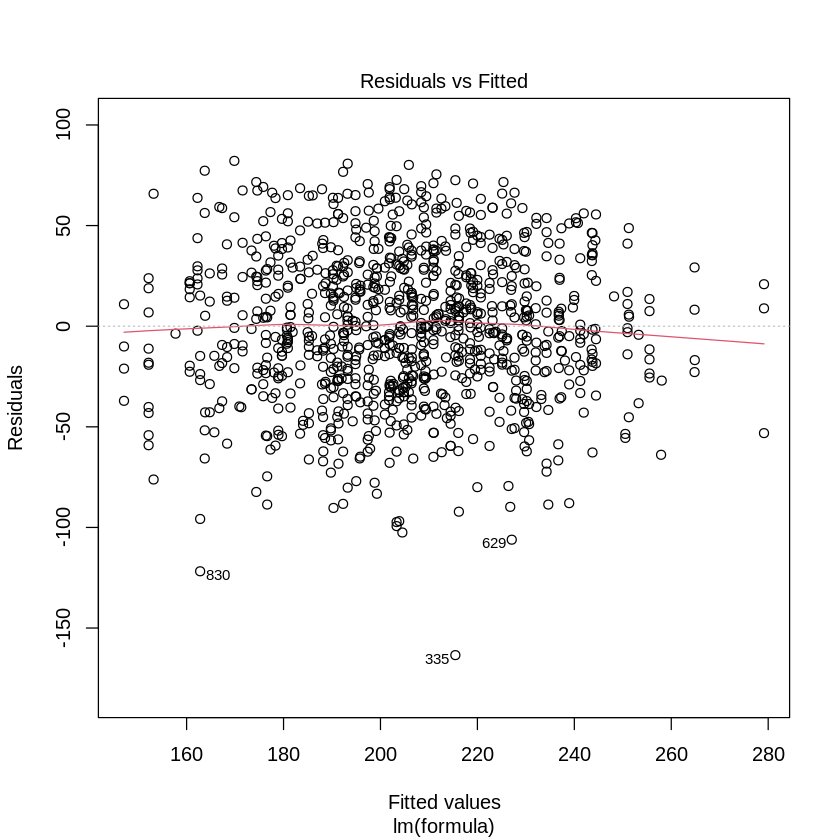

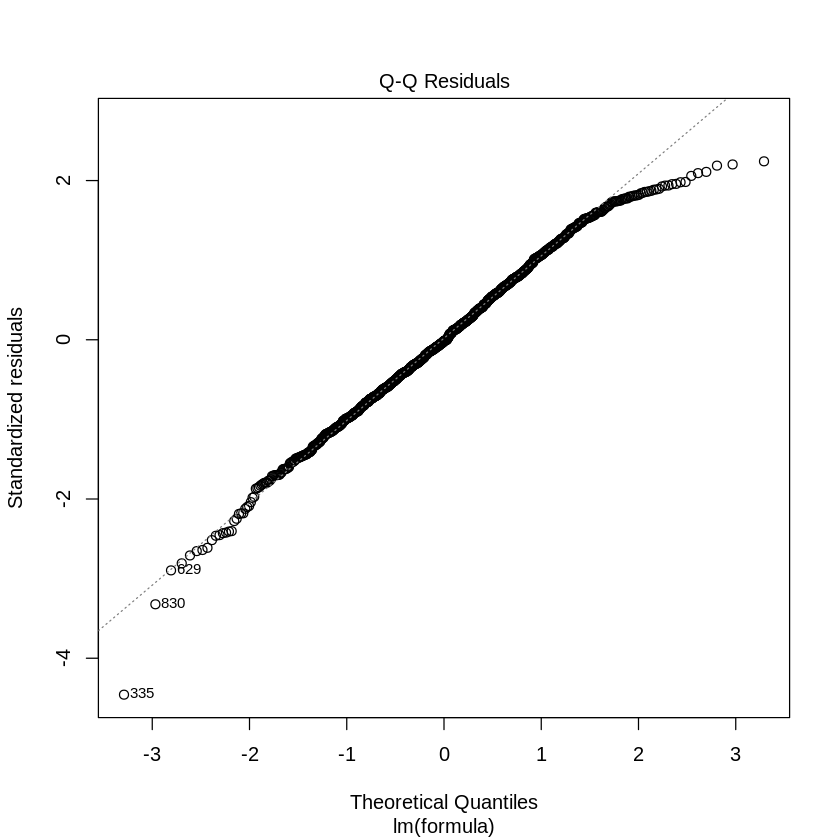

In [ ]:
plot(regression_model, 1)
plot(regression_model, 2)

### 1. **Linearity (Residuals vs. Fitted) Plot**

This plot is used to assess two main assumptions:
- **Linearity**: The residuals should be scattered randomly around the horizontal line (y = 0).
- **Homoscedasticity**: The residuals should have constant variance across all fitted values.

#### Observations:
- **Linearity**: The residuals appear to be randomly dispersed around the horizontal line at zero, without a clear pattern. This suggests that the assumption of linearity is mostly satisfied. However, the red LOESS smoothing line shows a slight downward trend at higher fitted values, which could indicate a mild non-linearity or an outlier effect.
  
- **Homoscedasticity**: The residuals seem to maintain a similar spread across most of the fitted values, but there are a few points, particularly at higher fitted values, that show increased variance (heteroscedasticity). The presence of outliers like points 335, 629, and 830 might be contributing to this issue.

### 2. **Q-Q Plot**

#### Observations:
- **Normality**: In a Q-Q plot, deviations from the line, especially at the tails, suggest non-normality. If residuals significantly deviate at either end of the plot, it indicates that the assumption of normality is violated.

### Conclusion:
Overall, while the linearity assumption is reasonably met, there are some concerns with homoscedasticity and potentially normality that should be addressed to improve the model’s accuracy and reliability.

# Exploring the data
---

In the previous exercises, we only looked at the effect on `total score`. Now that we know that some of our variables did significantly predict student exam scores let's explore it in more detail.

### Exercise 10
---

* Run a regression called `write_mod` using `writing_score` as the DV
* Run a regression called `read_mod` using `reading_score` as the DV
* Run a regression called `math_mod` using `math_score` as the DV
* Compare the results with the model from exercise 7 and comment your findings
* Compare the results of each model with each other. What inferences can you
make?
* Look at the difference in coefficents of significant variables between models - what does it tell you?


In [ ]:
get_regression_model <- function(in_df,dv_name) {
  # Create independent variables list
  ivs <- names(in_df)[!sapply(in_df, is.numeric)]

  # Create a line of formula for the linear model
  formula <- as.formula(paste(paste(dv_name, " ~"), paste(ivs, collapse = " + ")))
  cat("\n\n----------------------------------------------------------------------\n")
  cat(paste("Model by formula:",formula[2],formula[1],formula[3]))
  cat("\n----------------------------------------------------------------------")

  # Construct a linear regression model
  regression_model <- lm(formula, data = in_df)

  return(regression_model)
}

# from exercise 7 using new_df as data
# Run a regression called total_mod using total as the DV
total_mod <- get_regression_model(new_df,"total")
summary(exercise_7_mod)

# Run a regression called write_mod using writing_score as the DV
write_mod <- get_regression_model(new_df,"writing_score")
summary(write_mod)

# Run a regression called read_mod using reading_score as the DV
read_mod <- get_regression_model(new_df,"reading_score")
summary(read_mod)

# Run a regression called math_mod using math_score as the DV
math_mod <- get_regression_model(new_df,"math_score")
summary(math_mod)




----------------------------------------------------------------------
Model by formula: total ~ gender + ethnicity + parental_education + lunch + preparation_course
----------------------------------------------------------------------


Call:
lm(formula = formula, data = in_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-163.453  -24.851   -0.639   26.237   82.150 

Coefficients:
                                    Estimate Std. Error t value
(Intercept)                          205.679      5.448  37.754
gendermale                           -13.563      2.338  -5.801
ethnicitygroup B                      -6.106      4.865  -1.255
ethnicitygroup C                      -1.030      4.584  -0.225
ethnicitygroup D                      10.552      4.704   2.243
ethnicitygroup E                      24.838      5.050   4.918
parental_educationbachelor's degree    6.775      4.424   1.531
parental_educationhigh school         -7.058      3.775  -1.870
parental_educationmaster's degree     21.103      5.023   4.201
parental_educationsome college        -2.525      3.587  -0.704
parental_educationsome high school   -17.693      3.821  -4.631
lunchstandard                         27.516      2.441  11.270
prepar



----------------------------------------------------------------------
Model by formula: writing_score ~ gender + ethnicity + parental_education + lunch + preparation_course
----------------------------------------------------------------------


Call:
lm(formula = formula, data = in_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.981  -8.215   0.005   8.865  29.533 

Coefficients:
                                    Estimate Std. Error t value
(Intercept)                          73.8532     1.8360  40.224
gendermale                           -9.6656     0.7880 -12.266
ethnicitygroup B                     -2.0515     1.6398  -1.251
ethnicitygroup C                     -0.2992     1.5449  -0.194
ethnicitygroup D                      4.5199     1.5855   2.851
ethnicitygroup E                      6.7175     1.7020   3.947
parental_educationbachelor's degree   2.7716     1.4910   1.859
parental_educationhigh school        -3.0568     1.2724  -2.402
parental_educationmaster's degree     6.9218     1.6929   4.089
parental_educationsome college       -0.9651     1.2090  -0.798
parental_educationsome high school   -7.0965     1.2877  -5.511
lunchstandard                         8.3003     0.8228  10.087
preparation_cour



----------------------------------------------------------------------
Model by formula: reading_score ~ gender + ethnicity + parental_education + lunch + preparation_course
----------------------------------------------------------------------


Call:
lm(formula = formula, data = in_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.925  -8.842   0.034   8.908  30.482 

Coefficients:
                                    Estimate Std. Error t value
(Intercept)                          73.7033     1.8869  39.060
gendermale                           -7.9310     0.8098  -9.793
ethnicitygroup B                     -2.4824     1.6852  -1.473
ethnicitygroup C                     -0.9563     1.5877  -0.602
ethnicitygroup D                      1.8834     1.6294   1.156
ethnicitygroup E                      6.1740     1.7491   3.530
parental_educationbachelor's degree   2.0141     1.5323   1.314
parental_educationhigh school        -2.2827     1.3076  -1.746
parental_educationmaster's degree     6.2700     1.7398   3.604
parental_educationsome college       -1.0502     1.2425  -0.845
parental_educationsome high school   -5.8497     1.3233  -4.420
lunchstandard                         7.4742     0.8456   8.839
preparation_cour



----------------------------------------------------------------------
Model by formula: math_score ~ gender + ethnicity + parental_education + lunch + preparation_course
----------------------------------------------------------------------


Call:
lm(formula = formula, data = in_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.546  -8.603   0.344   9.389  32.366 

Coefficients:
                                    Estimate Std. Error t value
(Intercept)                          58.1226     1.8929  30.705
gendermale                            4.0336     0.8124   4.965
ethnicitygroup B                     -1.5724     1.6906  -0.930
ethnicitygroup C                      0.2255     1.5928   0.142
ethnicitygroup D                      4.1487     1.6346   2.538
ethnicitygroup E                     11.9464     1.7547   6.808
parental_educationbachelor's degree   1.9889     1.5372   1.294
parental_educationhigh school        -1.7189     1.3118  -1.310
parental_educationmaster's degree     7.9115     1.7454   4.533
parental_educationsome college       -0.5093     1.2465  -0.409
parental_educationsome high school   -4.7466     1.3275  -3.575
lunchstandard                        11.7418     0.8483  13.841
preparation_cour

### Regression Analysis Summary

#### Comparison with Exercise 7 Model

1. **`writing_score` Model (`write_mod`)**:
   - **Adjusted R-squared**: 0.352
   - **Key Findings**:
     - Significant predictors: `gendermale` (negative), `ethnicitygroup D` and `ethnicitygroup E` (positive), `parental_educationhigh school` (negative), `parental_educationmaster's degree` (positive), `lunchstandard` (positive), `preparation_coursenone` (negative).
     - The model explains about 35.2% of the variance in writing scores.

2. **`reading_score` Model (`read_mod`)**:
   - **Adjusted R-squared**: 0.2546
   - **Key Findings**:
     - Significant predictors: `gendermale` (negative), `ethnicitygroup E` (positive), `parental_educationmaster's degree` (positive), `parental_educationsome high school` (negative), `lunchstandard` (positive), `preparation_coursenone` (negative).
     - The model explains about 25.5% of the variance in reading scores.

3. **`math_score` Model (`math_mod`)**:
   - **Adjusted R-squared**: 0.2921
   - **Key Findings**:
     - Significant predictors: `gendermale` (positive), `ethnicitygroup D` and `ethnicitygroup E` (positive), `parental_educationmaster's degree` (positive), `parental_educationsome high school` (negative), `lunchstandard` (positive), `preparation_coursenone` (negative).
     - The model explains about 29.2% of the variance in math scores.

**Comparison of Models**:
- **Writing Score**: Shows the highest `Adjusted R-squared` (0.352), indicating it is the best predicted among the three scores. Significant predictors vary, with `gendermale` having a strong negative impact and `preparation_coursenone` significantly reducing scores.
- **Reading Score**: Has the lowest `Adjusted R-squared` (0.2546). Here, `gendermale` again shows a negative effect, and significant predictors include `ethnicitygroup E` and `parental_educationmaster's degree`.
- **Math Score**: Falls in between the other two models (`Adjusted R-squared` of 0.2921). `gendermale` shows a positive effect here, which is different from the `writing_score` model.

**Differences in Coefficients**:
- **Gender**: `gendermale` has a significant negative effect on both writing and reading scores, but a positive effect on math scores. This suggests that gender might affect different subjects differently.
- **Ethnicity**: `ethnicitygroup E` consistently shows a positive effect across models, with varying degrees of significance.
- **Parental Education**: The effects of `parental_education` categories differ across models. For example, `parental_educationmaster's degree` positively impacts writing and math scores but is not significant for reading scores.
- **Lunch and Preparation Course**: `lunchstandard` consistently shows a positive effect, and `preparation_coursenone` has a negative impact across all models.

**Inferences**:
- **Model Fit**: Writing score has the best model fit, while reading score is the least well-predicted. This might suggest that writing scores are more influenced by the variables considered, or that there is less variability unexplained by the model.
- **Impact of Predictors**: Significant predictors vary by subject, indicating that the factors influencing academic performance can differ based on the type of score. For example, the gender effect flips from negative in writing and reading to positive in math.
- **Common Predictors**: Some predictors like `lunchstandard` and `preparation_coursenone` show consistent effects across all models, underscoring their general importance in predicting academic performance.

In conclusion, while there are common factors influencing scores across subjects, the magnitude and direction of these influences vary, which reflects the complexity of academic performance and how it can be affected by different predictors.

# Reflection
----

## What skills have you demonstrated in completing this notebook?

- passion for learning
- out-of-the-box thinking
- emotional intelligence
- achieving results
- crisis management
- attention to detail
- quick acquisition of new skills and technologies
- persistence
- diligence

Your answer:

## What caused you the most difficulty?

Your answer:

- It was little difficult to remember the math statistics and analysis and also to quickly acquire new knowledge in this area.
- The most difficult thing  was to wrote and especially formated the researches conclusions.